## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

### Global Variables

In [2]:
binary_results = "Results/PredictionScores_BinaryClass.csv"
multiclass_results = "Results/PredictionScores_MultiClass.csv"
cross_project_dependencies = "Cross-Project-Dependencies.csv"
dependent_pairs = "Results/AllDependentPairs.csv"

### Import Model Predicitons

In [3]:
df_predictions = pd.read_csv(binary_results)
df_multiclass_predictions = pd.read_csv(multiclass_results)
df_cross_project = pd.read_csv(cross_project_dependencies)
df_pairs = pd.read_csv("Teddy_Data/ModelPairs.csv", low_memory = False)

In [4]:
df_predictions["Train Project"].unique()

array(['Core', 'MailNews Core', 'SeaMonkey', 'Bugzilla', 'Firefox',
       'Other Applications', 'NSS', 'Calendar', 'Thunderbird', 'Toolkit',
       'NSPR', 'Testing', 'Firefox Build System', 'Webtools'],
      dtype=object)

### Filter Out Predictions we care about

In [5]:
most_projects = ["Core", "Firefox", "Thunderbird", "Bugzilla", "Seamonkey", "DevTools", "MailNews Core", "Toolkit", "Testing", 
            "Infrastructure & Operations", "NSS"]

train_projects = ['Core', 'MailNews Core', 'SeaMonkey', 'Bugzilla', 'Firefox',
       'Other Applications', 'NSS', 'Calendar', 'Thunderbird', 'Toolkit',
       'NSPR', 'Testing', 'Firefox Build System', 'Webtools']

middle_projects = ["developer.mozilla.org", "Conduit", "Developer Documentation", "Developer Documentation", "Participation Infrastructure",
                  "Firefox for iOS", "NSPR", "mozilla.org", "Mozilla Foundation Communications", "Data Science", "Localization Infrastructure and Tools"]

x_ticks = [0,0.2,0.4,0.6,0.8,1]

In [6]:
df_predictions = df_predictions.drop(columns = "Unnamed: 0")

# Display Heat Map (Binary Class Predictions)

### Test Most

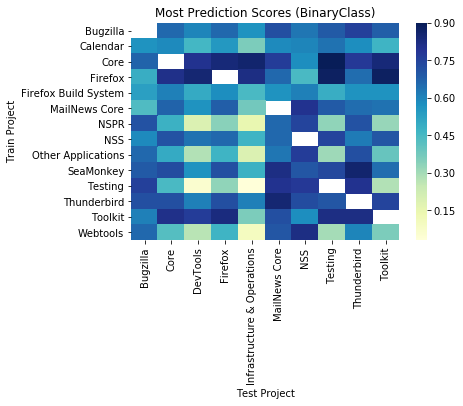

In [7]:
# Select duplicate rows except first occurrence based on all columns
df = df_predictions[df_predictions["Test Project"].isin(most_projects)]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Most Prediction Scores (BinaryClass)")
plt.show()

### Test Least

In [8]:
# Select duplicate rows except first occurrence based on all columns
df = df_predictions[df_predictions["Test Project"].isin(least_projects)]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Least Prediction Scores (BinaryClass)")
plt.show()

NameError: name 'least_projects' is not defined

### Test Middle

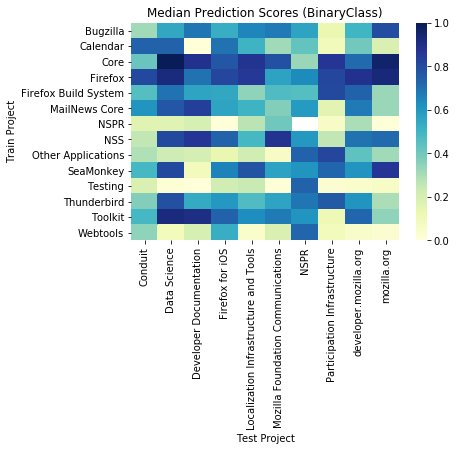

In [9]:
# Select duplicate rows except first occurrence based on all columns
df = df_predictions[df_predictions["Test Project"].isin(middle_projects)]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Median Prediction Scores (BinaryClass)")
plt.show()

### Everything

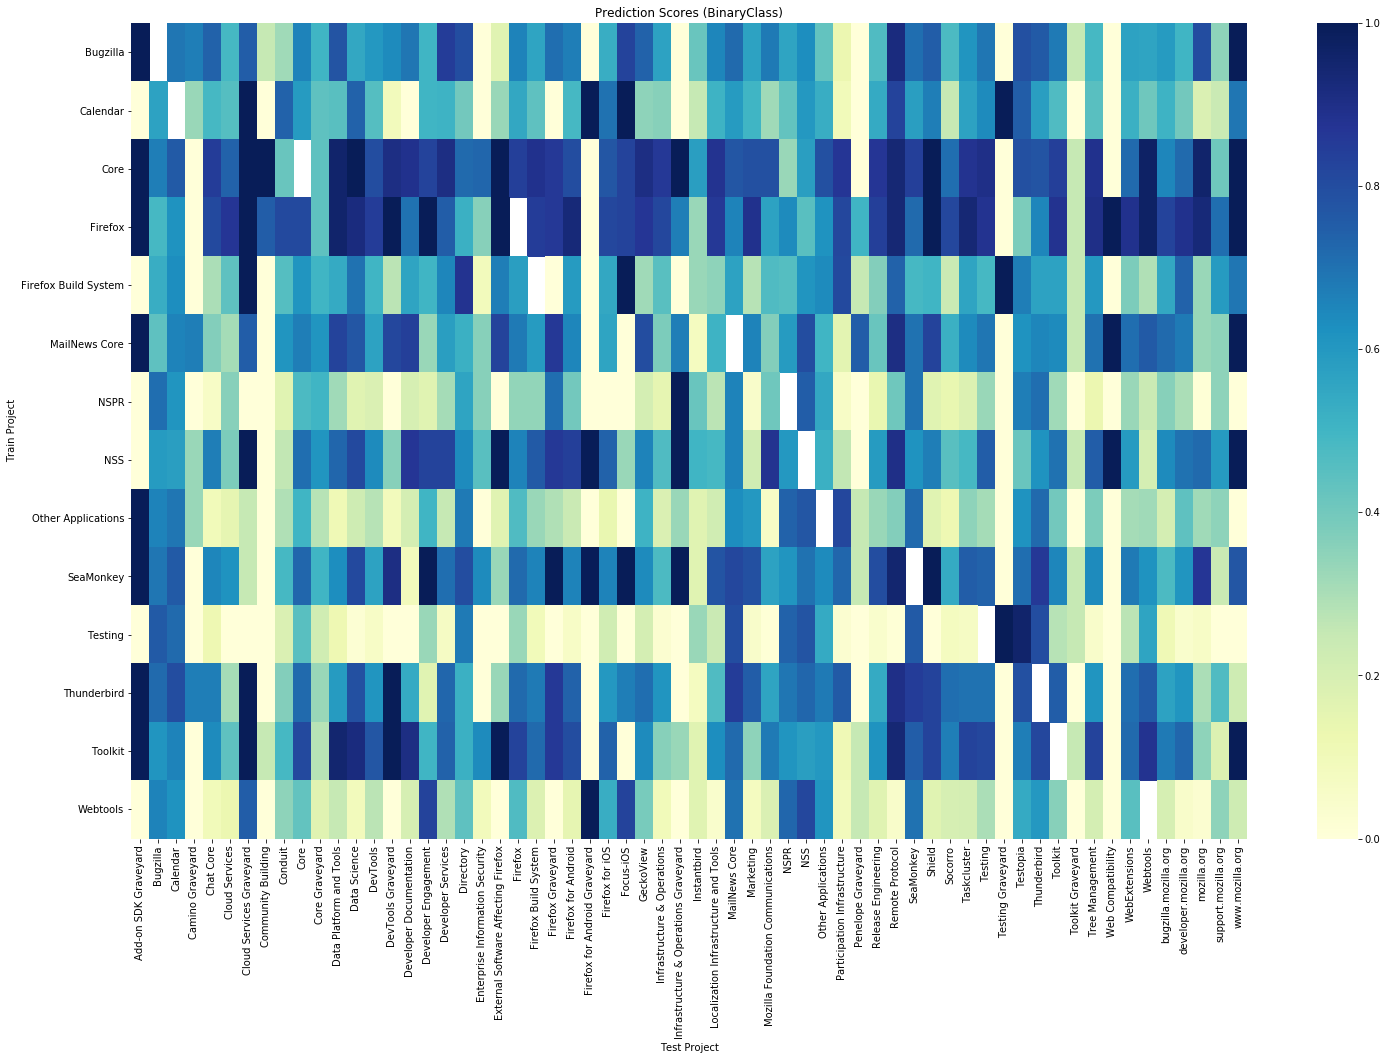

In [10]:
df = df_predictions.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,15)) 
ax = sns.heatmap(df,cmap="YlGnBu", ax = ax)
ax.set_title("Prediction Scores (BinaryClass)")
plt.show()

# Display Heat Map (Multi Class Predictions)

### Test most

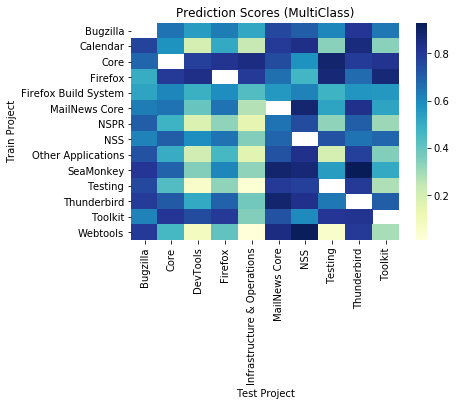

In [11]:
df = df_multiclass_predictions[df_multiclass_predictions["Test Project"].isin(most_projects)]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Prediction Scores (MultiClass)")
plt.show()

### Test middle

In [ ]:
df = df_multiclass_predictions[df_multiclass_predictions["Test Project"].isin(middle_projects)]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Prediction Scores (MultiClass)")
plt.show()

### Everything

In [ ]:
df = df_multiclass_predictions.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,15)) 
ax = sns.heatmap(df,cmap="YlGnBu", ax = ax)
ax.set_title("Prediction Scores (Multi Class)")
plt.show()

# Looking at cross-project dependencies

## Multiclass

In [ ]:
s = df_cross_project.iloc[0]["Cross-Project Dependencies"]
df = df_multiclass_predictions[df_multiclass_predictions["Train Project"] == "Core"]
df = df[df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,15)) 
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Prediction Scores (MultiClass)")
plt.show()

## Binary Class

In [ ]:
s = df_cross_project.iloc[0]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "Core"]
df = df[df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,15)) 
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Prediction Scores (Binary Class)")
plt.show()

### Firefox Comparisons

In [ ]:
s = df_cross_project.iloc[2]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "Firefox"]
df = df[df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

average = np.average(df["Prediction Score"])

print("Firefox has {} cross-project dependencies of these projects, the average score is {:.2f}".format(len(df["Prediction Score"]),average))

In [ ]:
s = df_cross_project.iloc[2]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "Firefox"]
df = df[~df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

average = np.average(df["Prediction Score"])

print("Firefox has {} cross-project dependencies of these projects, the average score is {:.2f}".format(len(df["Prediction Score"]),average))

In [ ]:
s = df_cross_project.iloc[2]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "Firefox"]
df = df[df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,10)) 
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Firefox Prediction Scores for Cross-Dependent Projects (Binary Class)")
plt.show()

In [ ]:
s = df_cross_project.iloc[2]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "Firefox"]
df = df[~df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
df = df.pivot("Train Project", "Test Project", "Prediction Score")
fig, ax = plt.subplots(figsize=(25,10)) 
ax = sns.heatmap(df,cmap="YlGnBu")
ax.set_title("Firefox Prediction Scores for Non Cross-Dependent Projects (Binary Class)")
plt.show()

### Mailnews Core

In [ ]:
s = df_cross_project.iloc[1]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "MailNews Core"]
df = df[df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

average = np.average(df["Prediction Score"])

print("Firefox has {} cross-project dependencies of these projects, the average score is {:.2f}".format(len(df["Prediction Score"]),average))

In [ ]:
s = df_cross_project.iloc[1]["Cross-Project Dependencies"]
df = df_predictions[df_predictions["Train Project"] == "MailNews Core"]
df = df[~df["Test Project"].isin(literal_eval(s))]
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

average = np.average(df["Prediction Score"])

print("Firefox has {} cross-project dependencies of these projects, the average score is {:.2f}".format(len(df["Prediction Score"]),average))

# Analyzing Prediction Scores from cross-project dependencies

In [16]:
comparison_df = pd.DataFrame(columns = ["Train Project", 
                                        "Total Projects",
                                        "Cross-Dependent Projects", 
                                        "Binary Class Cross-Dependent Average Prediction Score", 
                                        #"Multi Class Cross-Dependent Average Prediction Score",
                                        #"Non Cross-Dependent Project Count",
                                        "Binary Class Non Cross-Dependent Average Prediction Score"])
                                        #"Multi Class Non Cross-Dependent Average Prediction Score"])
df_predictions.drop_duplicates()

for i in range(len(df_cross_project)):
    cross_projects = df_cross_project.iloc[i]["Cross-Project Dependencies"]
    df_name = df_cross_project.iloc[i]["Project"]
    
    if (df_name in df_predictions["Train Project"].unique()):
        ## find the predicition for binary class that have cross project dependencies
        df = df_predictions[df_predictions["Train Project"] == df_name]
        df = df[df["Test Project"].isin(literal_eval(cross_projects))]
        df = df.drop_duplicates(subset=None, keep='first', inplace=False)

        binary_cross_average = np.average(df["Prediction Score"])
        cross_count = len(df["Prediction Score"])
        
        ## find the prediction for multiclass that have cross project dependencies
        #df = df_multiclass_predictions[df_multiclass_predictions["Train Project"] == df_name]
        #df = df[df["Test Project"].isin(literal_eval(cross_projects))]
        #df = df.drop_duplicates(subset=None, keep='first', inplace=False)
        
        #multiclass_cross_average = np.average(df["Prediction Score"])
        
        ## find the prediction for binary class that don't have cross project dependencies
        df = df_predictions[df_predictions["Train Project"] == df_name]
        df = df[~df["Test Project"].isin(literal_eval(cross_projects))]
        df = df.drop_duplicates(subset=None, keep='first', inplace=False)

        non_cross_average = np.average(df["Prediction Score"])
        non_cross_count = len(df["Prediction Score"])
        
        ## find the prediction for multi class that don't have cross project dependencies
        ##df = df_multiclass_predictions[df_multiclass_predictions["Train Project"] == df_name]
        #df = df[~df["Test Project"].isin(literal_eval(cross_projects))]
        #df = df.drop_duplicates(subset=None, keep='first', inplace=False)
        
        #multiclass_non_cross_average = np.average(df["Prediction Score"])
        
        total_project = cross_count + non_cross_count

        result = {"Train Project" : df_name, 
                  "Total Projects" : total_project,
                  "Cross-Dependent Projects": cross_count,
                  "Binary Class Cross-Dependent Average Prediction Score": "{:.2f}".format(binary_cross_average), 
                  #"Non Cross-Dependent Project Count": non_cross_count,
                  "Binary Class Non Cross-Dependent Average Prediction Score": "{:.2f}".format(non_cross_average)}

        comparison_df = comparison_df.append(result, ignore_index = True)
        
        
    else:
        continue
    

In [17]:
comparison_df

,Train Project,Total Projects,Cross-Dependent Projects,Binary Class Cross-Dependent Average Prediction Score,Binary Class Non Cross-Dependent Average Prediction Score
0,Core,61,40,0.75,0.70
1,MailNews Core,61,9,0.68,0.56
2,Firefox,61,26,0.84,0.66
3,SeaMonkey,61,13,0.55,0.65
4,Thunderbird,61,18,0.60,0.54
5,Toolkit,61,24,0.65,0.57
6,Bugzilla,61,2,0.65,0.55
7,NSS,61,4,0.62,0.59
8,Firefox Build System,61,23,0.48,0.47
9,Testing,61,15,0.15,0.25


### Dependent Pairs